In [1]:
from pornhub_api import PornhubApi
import networkx as nx
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from time_conv import *
from graph import PornGraph
from pyvis.network import Network
from collections import Counter
import seaborn as sns
sns.set_theme()
sns.set_context("talk")
sns.color_palette("tab10")
 

graph = PornGraph()
graph.from_csv('converted.csv')

liczba osób ogólnie 11836
liczba osób w obliczeniach 9039


### cliques


<AxesSubplot:xlabel='wielkość kliki', ylabel='liczba wystąpień'>

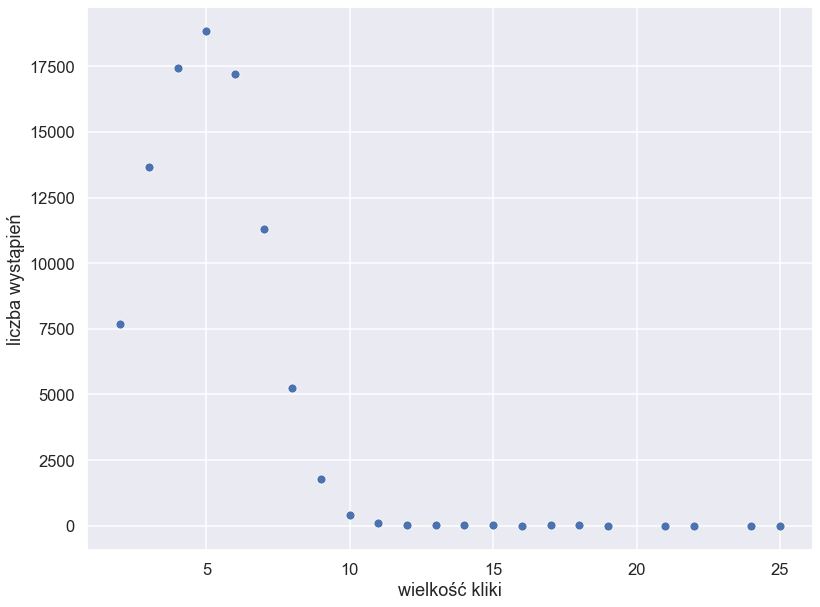

In [2]:
list_of_cliques = [len(x) for x in graph.biggest_clique()]

data = Counter(list_of_cliques)
data = pd.DataFrame(list(zip(data.keys(), data.values())), columns=['wielkość kliki', 'liczba wystąpień'])


plt.figure(figsize=(13,10))
sns.scatterplot(data, x='wielkość kliki',y='liczba wystąpień')

## diameter and density

In [3]:
print('średnica', graph.diameter)
print('gęstość', graph.density)


średnica 16
gęstość 0.0017156605509782165


# videos count

count    16176.000000
mean        10.200729
std         11.651713
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         49.000000
Name: videos_made, dtype: float64

<AxesSubplot:xlabel='videos_made', ylabel='Count'>

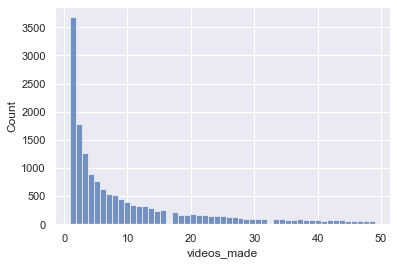

In [19]:
df = pd.read_csv('stars.csv',index_col=0,header=0, names=['star_name','url','videos_made'])
df = df[df.videos_made > 0] # stars without movies doesn't have any value to our analyst
display(df.videos_made.describe())

df = df[df.videos_made < 50]
sns.histplot(data=df, x='videos_made')

# dynamic of network

<AxesSubplot:xlabel='date', ylabel='ilość nagrań'>

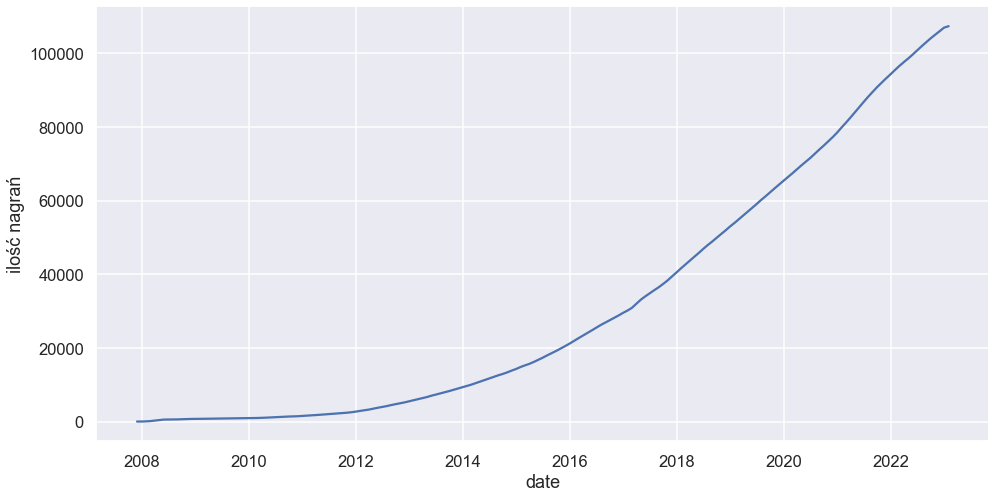

In [8]:
df_net = pd.read_csv('videos.csv',index_col=0)
df_net['date'] = pd.to_datetime(df_net['date'])
df_net.sort_values('date',inplace=True,kind='mergesort')
df_net.set_index('date',inplace=True)
df_net.sort_index()
df_net['ilość nagrań'] = 1


df_net = df_net.groupby(pd.Grouper(freq='M'))['ilość nagrań'].sum()
df_net =df_net.cumsum()
plt.figure(figsize=(16,8))
sns.lineplot(data=df_net)

# how many movies are added monthly

<AxesSubplot:xlabel='date', ylabel='ilość nagrań w miesiącu'>

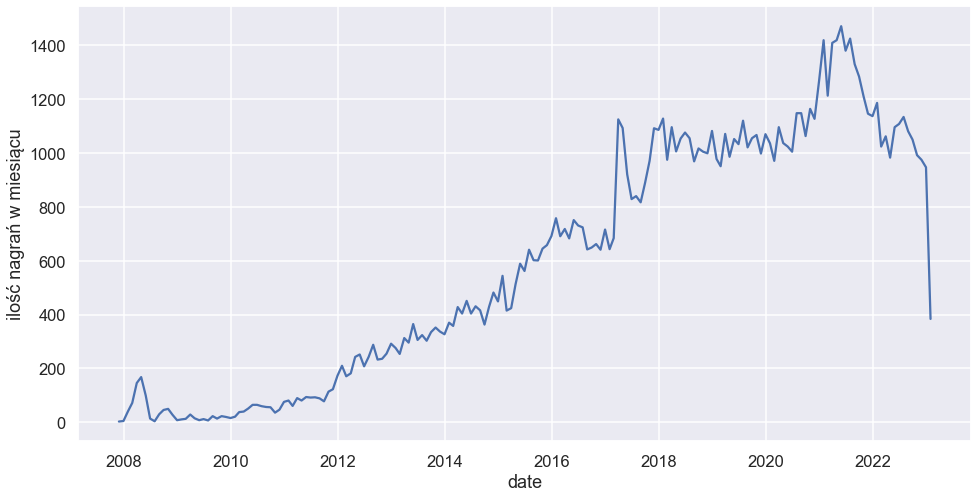

In [7]:
df_net = pd.read_csv('videos.csv',index_col=0)
df_net['date'] = pd.to_datetime(df_net['date'])
df_net.sort_values('date',inplace=True,kind='mergesort')
df_net.set_index('date',inplace=True)
df_net.sort_index()
df_net['ilość nagrań w miesiącu'] = 1


df_net = df_net.groupby(pd.Grouper(freq='M'))['ilość nagrań w miesiącu'].sum()
plt.figure(figsize=(16,8))
sns.lineplot(data=df_net)
